# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key

from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/city.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
city_list = []
print(f"Beginning data retrieval")
print("------------------------------")


for city in cities:
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ api_key
    city_url = base_url + "&q="+city

    
    try:
        # make request and print url
        city_data = requests.get(city_url).json()
       # print(f"Processing record {city_list.index[0]}of {city_list.set_index[0]} {city}")
    
        city_lat = city_data['coord']['lat']
        city_lon = city_data['coord']['lon']
        city_temp = city_data ['main']['temp_max']
        city_humidity = city_data['main']['humidity']
        city_cloud = city_data['clouds']['all']
        city_country = city_data['sys']['country']
        city_windsp = city_data['wind']['speed']
        city_date = city_data['dt']
        city_list.append({'City':city,'Cloudiness':city_cloud,'Country':city_country,'Date':city_date,'Humidity':city_humidity,'Lat':city_lat,'Lng': city_lon,'Max Temp':city_temp,
                         'Wind speed':city_windsp,})
        
    except (KeyError, IndexError):
        print("City not found .. skipping.")
        
        print(city_list)
    


    

In [ ]:
city_list

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# Save Data to csv
#city_data_df = output_data_file
city_list_df = pd.DataFrame(city_list)
city_list_df
city_list_df.to_csv("output_data_file", index=False, header=True)
city_list_df.head(10)

# Visualize to confirm airport data appears
#city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind speed
0,shache,1,CN,1562866978,66,38.42,77.24,88.00,1.01
1,fairbanks,90,US,1562866833,88,64.84,-147.72,66.99,6.93
2,rikitea,69,PF,1562866978,82,-23.12,-134.97,73.65,17.27
3,solina,0,BA,1562866978,43,44.56,18.70,71.60,1.12
4,victoria,75,BN,1562866978,88,5.28,115.24,78.80,7.96
5,kapaa,75,US,1562866978,78,22.08,-159.32,80.60,12.75
6,port-gentil,75,GA,1562866979,83,-0.72,8.78,77.00,9.17
7,broome,20,GB,1562866979,64,52.47,1.45,77.00,6.93
8,mar del plata,24,AR,1562866979,54,-46.43,-67.52,46.65,13.40
9,aksu,0,KZ,1562866979,59,52.04,76.93,62.60,11.18


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

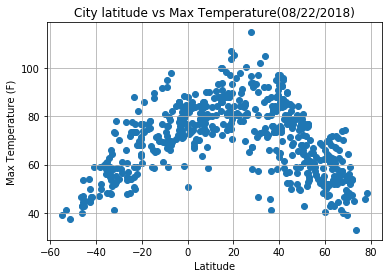

In [35]:
# Build a scatter plot for each data type
plt.scatter(city_list_df["Lat"], city_list_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City latitude vs Max Temperature(08/22/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_lat_vs_temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

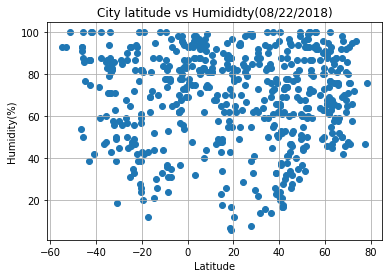

In [36]:
# Build a scatter plot for each data type
plt.scatter(city_list_df["Lat"], city_list_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City latitude vs Humididty(08/22/2018)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_lat_vs_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

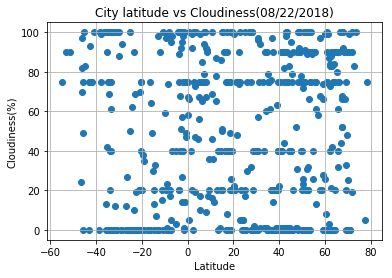

In [38]:
# Build a scatter plot for each data type
plt.scatter(city_list_df["Lat"], city_list_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City latitude vs Cloudiness(08/22/2018)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_lat_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

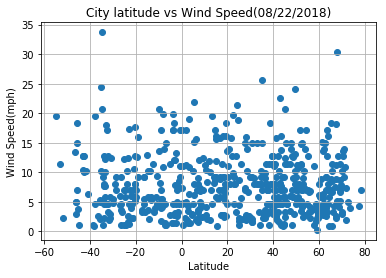

In [40]:
# Build a scatter plot for each data type
plt.scatter(city_list_df["Lat"], city_list_df["Wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("City latitude vs Wind Speed(08/22/2018)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City_lat_vs_wind_speed.png")

# Show plot
plt.show()